## Assignment 1



This is the first of two assignments for the course Python: programming for economists. The course website explains how the grading of these two assignments works.

As this is your first python assignment, we start with two example assignments that we solve for you. This gives you an idea of what is expected of you.

Solving economic models is a bit too advanced for now (we cover that later in the course), so we will consider statistical problems. Most of these problems have analytical solutions, but we are not interested in that. We want you to simulate the problem and get the answer in this way.



### Example 1



A famous statistical puzzle is called [the birthday problem](https://en.wikipedia.org/wiki/Birthday_problem). There are $n$ people in a room. What is the probability that at least two of them have the same birthday. That is, their birthday is on the same day (e.g. August 1st). The question is not about their birth date (August 1st, 1987).

How many people $n$ are needed for this probability to exceed 0.5?

As the wikipedia site shows, you can calculate this analytically. But, again, we are not interested in this.

To solve this problem, we will use two python libraries that we import here:



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

To put some structure on the problem we are going to assume that there are 365 days in a year and that the distribution of birthdays over these 365 days is uniform. Hence you are equally likely to have your birthday on July 1st as on December 31st.

We are going to solve this problem with simulation. We start with, say, $n=23$ people in the room. A birthday is a number between 0 and 365, where 0 represents January 1st and 364 is December 31st. Hence we draw 23 of these numbers and check whether some of these numbers are the same. If they are the same, we have "two people with the same birthday".

How do we randomly generate numbers between 0 and 365 using numpy? Simply google "numpy randomly select number" and you will find a link to [https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html)

Now that we know what we are looking for, we can read the documentation in our notebook:



In [ ]:
np.random.randint?

Docstring:
randint(low, high=None, size=None, dtype=int)

Return random integers from `low` (inclusive) to `high` (exclusive).

Return random integers from the "discrete uniform" distribution of
the specified dtype in the "half-open" interval [`low`, `high`). If
`high` is None (the default), then results are from [0, `low`).

.. note::
    New code should use the ``integers`` method of a ``default_rng()``
    instance instead; please see the :ref:`random-quick-start`.

Parameters
----------
low : int or array-like of ints
    Lowest (signed) integers to be drawn from the distribution (unless
    ``high=None``, in which case this parameter is one above the
    *highest* such integer).
high : int or array-like of ints, optional
    If provided, one above the largest (signed) integer to be drawn
    from the distribution (see above for behavior if ``high=None``).
    If array-like, must contain integer values
size : int or tuple of ints, optional
    Output shape.  If the given shape is, 

One thing to note is "Return random integers from low (inclusive) to high (exclusive)". Hence, if we want to be able to draw 364 as well, we need to use:



In [ ]:
np.random.randint(0,365)

264

We have 23 people in the room, hence we will use:



In [ ]:
np.random.randint(0,365,size = 23)

array([  9, 301, 151, 221, 186, 193,   4, 213, 353, 328,  78, 205, 212,
       362, 283, 173, 353,  27, 250,  89,  43, 113, 266])

Since this is random, your numbers will be different from the ones I see.

How do we determine whether two of these numbers in the array are the same? One solution is to loop over the array two times and see whether we find numbers that are equal. Something like:



In [ ]:
dates = np.random.randint(0,365,size=23)
for i in range(23):
    for j in range(i+1, 23):
        if dates[i] == dates[j]:
            print("two people have the same birthday")

**Remark:** Take some time to understand this code. E.g. what does the notation `dates[i]` mean? Why don't we use `for j in range(0,23)`?

There is nothing wrong with this code, except that in python we do not like loops. For one thing: they tend to be slow.

Hence, we need to think about our problem. This "thinking" is the fun of programming. Try to get a different perspective on the same problem and then figure out whether a function exists that accommodates this new perspective.

To illustrate this "thinking": up till now we are focused on determining whether we have two people with the same birthday. But often in these type of statistical problems it helps to consider the complement: when does everyone have a different birthday?

This would happen in case everyone has a **different** birthday. That is, the numbers in our array `dates` are all unique. Back to google: "numpy unique elements". This will give a link to: [https://numpy.org/doc/stable/reference/generated/numpy.unique.html](https://numpy.org/doc/stable/reference/generated/numpy.unique.html)

Again use `np.unique?` to see the documentation in your notebook. This function returns the unique elements in an array. Just to illustrate this:



In [ ]:
print(np.unique([1,2,3,4]))
print(np.unique([10,10,30]))

[1 2 3 4]
[10 30]


Hence, we have duplicate elements in an array like `dates` if the length &#x2013;use the function `len()`&#x2013; of `np.unique(dates)` is lower than the length of `dates` itself:



In [ ]:
dates =  np.array([10,10,30])
len(np.unique(dates)) < len(dates)

True

So the code we want to use is:



In [ ]:
n = 23
dates = np.random.randint(0,365,size=n)
len(np.unique(dates)) < n

False

With this code we can see whether for a randomly drawn group of 23 people, there are at least two people with the same birthday.

So how do we get to a probability that this happens?

Time to think again. The idea of a probability is to express how likely an event is &#x2013;here two people with the same birthday&#x2013; if we were to repeat it a lot of times. So we will repeat the birthday problem $N=5000$ times. Then we calculate in which fraction of cases, we observed at least two people with the same birthday.

Repeating the experiment in numpy is easy. Think of one experiment (one array of numbers `dates`) as a row. Now we analyze 5000 such rows. Hence, we create a matrix `dates` with $N=5000$ rows and and each row has the birthday of $n=23$ people:



In [ ]:
n = 23
N = 5000
dates = np.random.randint(0,365,size=(N,n))
dates.shape

(5000, 23)

Now we want to check the condition `len(unique(x)) < n` for each row `x` in the matrix `dates`. One way to check this condition for each row, is to use list-comprehension. This generates a list with 5000 elements. Each element is either `True` or `False`.



In [ ]:
len([len(np.unique(x)) < n for x in dates])

5000

`True` means that `len(unique(x)) < 23` for a particular row: there were at least two people with the same birthday.

Finally, we use that python represents `True` as 1 and `False` as 0. Hence, summing the list gives the number of cases out of $N=5000$ where two or more people had the same birthday. Dividing this sum by $N=5000$ gives the probability of this happening:



In [ ]:
np.sum([len(np.unique(x)) < n for x in dates])/N

0.514

Hence, with 23 people the probability of having two or more people with the same birthday already exceeds 50%.

If we want to plot how the probability of at least two people with the same birthday varies with $n$, we use the code above in a function:



In [ ]:
def birthdays(n,N=5000):
    dates = np.random.randint(0,365,size=(N,n))
    return np.sum([len(np.unique(x)) < n for x in dates])/N

And then we plot this function:



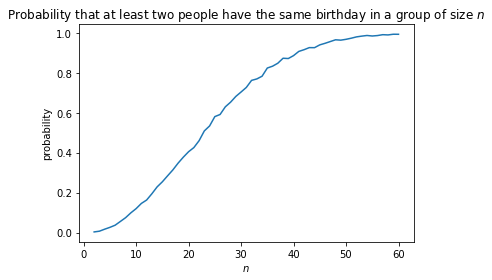

In [ ]:
range_n = np.arange(2,61)
plt.plot(range_n,[birthdays(n) for n in range_n])
plt.xlabel('$n$')
plt.ylabel('probability')
plt.title('Probability that at least two people have the same birthday in a group of size $n$');

Using the figure, you can see for which value of $n$ the probability of at least two birthdays exceeds 0.5. Note that with a group of 60 people you are almost guaranteed that at least two people have the same birthday.



### Example 2



For this assignment you only need the numpy library:



In [ ]:
import numpy as np

The idea of this assignment is to compare three experiments and see which one is more likely to lead to a success. The experiments involve rolling dice. The point is that our intuitions about which event is more likely are notoriously bad. Hence, you either need to calculate the probabilities analytically ("by hand") or we simulate the experiments and see which one is more likely.

The point of this assignment is to simulate the probabilities using python and numpy.

In the first experiment we role a die six times. The experiment is a "success" if there is at least one 6 in the six roles. In the second experiment, we role a die twelve times. Experiment 2 is a success if we have at least two 6 in twelve roles. Finally, we role the die eighteen times. This final experiment is a success if we have at least three 6 in the eighteen roles.

Summarizing:

-   experiment 1: at least one 6 in six roles of the die;
-   experiment 2: at least two 6 in twelve roles of the die;
-   experiment 3: at least three 6 in eighteen roles of the die.

Program the experiments in python and show which of the three experiments is more likely to be successful. Explain the code that you are using.



#### answer

In your own assignments (including the final assignment) we expect you to explain the code that you use. However, here we do not give any explanation. If you did not find the answer yourself, we want you to examine the following code closely and figure out for yourself how this works.

An important thing to note is that we use numpy arrays to solve the problem; not for-loops.

In [ ]:
N = 10000
die_roles = np.random.randint(1,7,size=(N,18))
experiment_1 = np.sum(np.sum(die_roles[:,:6] == 6,axis=1) > 0)/N
experiment_2 = np.sum(np.sum(die_roles[:,:12] == 6,axis=1) > 1)/N
experiment_3 = np.sum(np.sum(die_roles[:,:18] == 6,axis=1) > 2)/N
print(experiment_1, experiment_2, experiment_3)


0.6546 0.6146 0.5944


## Assignment

In this assignment, we will consider an interesting statistical phenomenon. When we consider variables that are normally distributed, the mass of observations moves away from the mean as the dimensions increase. The goal of the assignment is for you to verify this property using python.

The objective of the assignment is that you learn how to add dimensions to a problem, once you have solved it in the one dimensional case. Further, you will be using =numpy='s =random= library and =scipy='s =stats= library to generate random numbers and plot density functions.

When we think of a normal distribution, we tend to think that most observations are "somewhere in the middle", that is around the mean. Indeed, the 95% interval around the mean consists of 95% of the observations. This is true by definition, but we can also check this using python in the following way.

First, we import the libraries that we need.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


To see which percentage of people fall in the 95% interval, consider the following code.

*Question* Use a markdown cell to explain the python code:


In [ ]:
n_observations = 10000
data = np.random.normal(0,1,size=(n_observations))
percentiles = np.percentile(data, [2.5,97.5])
mask = (data > percentiles[0])&(data < percentiles[1])
np.sum(mask)/n_observations


0.95

*your explanation of this code*

The outcome (around 0.95) is hardly surprising... But the code provided (once you understand it), will help with the main question of this assignment.

Before we do this, let's visualize the result.

*Question* Plot the density function of the normal distribution that we use in the code block above. In this figure, shade the 95% interval.

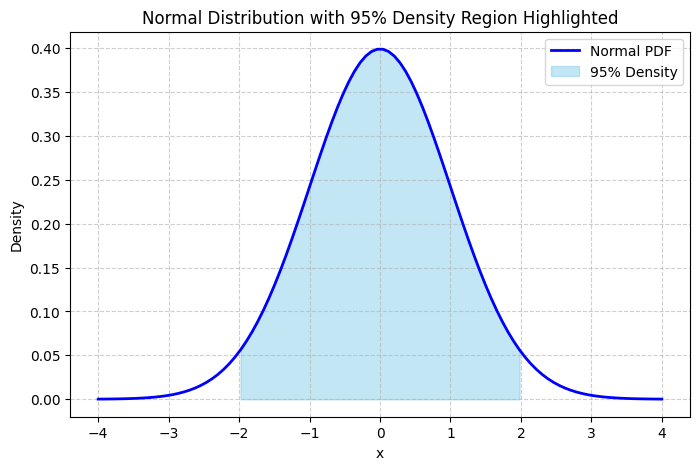

In [ ]:
# np.linspace(-4, 4, 100) is a code that creates an array of 100 values. These values are evenly spaced between 4 and -4.
x = np.linspace(-4, 4, 100)

# norm.pdf(x) this code will make the normal distribution for each value of x computed by the probability density function
y = norm.pdf(x)

# plt.figure(figsize=(8, 5)) is a code just to visualize the a graph
plt.figure(figsize=(8, 5))

# This code will plot y (the density) on the vertical axis and x on the horizontal axis of the graph.
# The label in de function will give a label for the curve.
# color="blue" will give the line the collor blue.
# linewidth=2 will make the line a little thicker.
plt.plot(x, y, label="Normal PDF", color="blue", linewidth=2)

#  The code will fill in the area under the curve.
# (x > -2) & (x = 2) this code is going to create a condition that will only be selected on the x-axis between 2 and -2.
# y is the same as the density function, so only below the density curve, the region will become blue.
# color="skyblue" determines that the color of the shaded area above is skyblue.
# alpha=0.5 this makes the collor blue a little more transparent
# label="95% density" gives the assigned area a label
plt.fill_between(x, y, where=(x > -2) & (x < 2), color="skyblue", alpha=0.5, label="95% Density")

# plt.xlable("x") creates a label on the horizontal x axis
plt.xlabel("x")

# ptl.ylabel("desnity") creates a label on the vertical y axis
plt.ylabel("Density")

# plt.title creates a title above the figure
plt.title("Normal Distribution with 95% Density Region Highlighted")

# plt.grid makes it easier to visualize the graph
plt.grid(True, linestyle="--", alpha=0.6)

#creates the legend
plt.legend()

#shows the plot
plt.show()

*Question:* The data above is one-dimensional. We only have an $x$ variable (so to speak). Now we are going to generalize this to $x_1, x_2, ..., x_m$. That is, for each unit of observation we have $m$ different measurements/variables. If the unit of observation is country, $x_1, x_2, ...$ could be gdp, unemployment, inflation, fraction of people above age 65 etc. Or if the unit of observation is people, the variables could relate to length, weight, income etc. For each of these $m$ measurements we can determine the 95% interval. What we are interested in is the fraction of people who are in all 95% intervals as a function of $m$. Above we solved this for $m=1$. Solve this for $m=1,2,3...,150$ and plot the fraction of people who are in all 95% intervals as a function of $m$. We assume that the observations in the different dimensions are independently normally distributed.

hint 1: this question is not easy and it is no problem if you cannot solve it. But use the markdown cells to explain to us how you want to solve this and then provide the code that implements your solution. The goal of the assignment is that you try to figure out how to program and solve a rather abstract problem. If you cannot solve this in your first attempt, use your second submission to explain what you learned.

hint 2: if you use numpy arrays to solve this (which is recommended), you may want to look up the numpy function `cumprod`.

note: handing in an empty assignment saying "this is too difficult" will not give you any points. Make a serious attempt and explain to us what you are doing/trying.

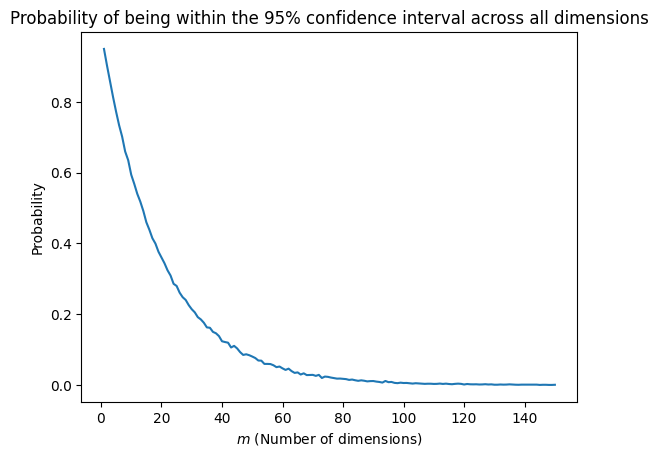

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# def = used to define a function
# calculate_95_percent_interval_m = name of the function
# m = number of observations in each simulation
# n=5000 = this will be simulated 5000 times
def calculate_95_percent_interval_m(m, N=5000):

#this code will generate a dataset of normally distributed random numbers
# The dataset will show N rows and M numbers. Each entre will have a normal distribution mean of 0 and a standard deviation of 1
# each row is a separate simulation with m observations
    data = np.random.normal(0, 1, size=(N, m))

#This code will calculate the 2.5th percentile and 97.5 percentile for each column we have, to give the bounds for each interval.
    percentiles = np.percentile(data, [2.5, 97.5], axis=0)

# checks if each value in the dataset falls between the 2.5th percentile and the 97.5 percentile
# within_interval is true when the interval falls within the interval
    within_interval = (data > percentiles[0]) & (data < percentiles[1])

# check if the values are true within the rows, so if they are within the 95% confidence interval across all the dimensions.
    success_in_all_dimensions = np.all(within_interval, axis=1)

# This code is going to calculate the probability of the simulation being within the 95% intervall for all dimensions. This is calculated by taking the average of the successes.
    return np.mean(success_in_all_dimensions)

# this code represents different values for m to test the functions across
range_m = np.arange(1, 151)

#The code will run a function for each value of M in the range_m and this will collect the probabilities for each dimension count
# the result will be saved in probabilities
probabilities = [calculate_95_percent_interval_m(m) for m in range_m]

# This following codes is giving the graphs some details
plt.plot(range_m, probabilities)
plt.xlabel('$m$ (Number of dimensions)')
plt.ylabel('Probability')
plt.title('Probability of being within the 95% confidence interval across all dimensions')
plt.show()

### What did you get wrong the first time and why?



This section you only need to fill in after the assignment was discussed in class.


### What did you learn from this assignment?



This section you only need to fill in after the assignment was discussed in class.




The results The code above transforms the one-dimensional case to multiple dimensions (m). It represents the probability that a randomly generated observation falls within the 95% confidence interval across all the dimensions. The code will generate an N x M dataset. Where each data point will be a random number with a mean of 0 and a standard deviation of 1 again. Then, for each dimension in will calculate the boundaries of the 95% confidence interval, the 2.5th percentile, and the 97.5 percentile. The code will then check for each value generated whether it falls within the 95% confidence interval across all the dimensions for every simulation. We will then calculate the average probability by averaging the cases where all values fall within the 95% confidence interval. We will test the different values for m. Finally, the results will be shown in the graph, with the probability of being within the 95% confidence interval across all the dimensions.

As can be seen in the graph. The probability of an observation falling with every dimension within the 95% decreases as the number of dimensions increases. The results of this graph make sense. since the probability of falling within one dimension is 95% and falling within 2 dimensions is 0.95*0.95=0.925. The more dimensions you add the more times you have to multiply it the smaller the probability of falling within all dimensions.

What did we do wrong and what did we learn?
First, we learned a lot about programming in Python, Jupyterlite, and Github. We both had never used Python before. So, starting this assignment was a bit hard in the beginning. But, with data camp and YouTube we learned a lot and slowly we were making progress. For the first part of assignment one we thought too complicated about the code and graph. For example, for the first part of the assignment we were trying a way too complicated graph. However, the feedback lecture made sure we understood the first part of the assignment better. We took some notes and remade the first part. We immediately corrected the first part of the first assignment.
